In [1]:
# Import libraries and dependencies 

import pandas as pd
from pathlib import Path
import datetime
import numpy as np
import json as json

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Set file paths
mortgage_path = Path("mortgage_rates.xlsx")
inflation_path = Path("inflation.csv")
boc_path = Path("BankofCanadaRateHistory.csv")
bond_path = Path("bond_rates.csv")
chartered_bank_path = Path("1010011601-eng.csv")
gdp_path = Path("GDP1990-2007.csv")
gdp_index_path = Path("CANLORSGPNOSTSAM.csv")
employment_path = Path("employment.csv")

In [4]:
#read in csv and xlsx files
inflation_df = pd.read_csv(inflation_path, index_col="REF_DATE", parse_dates=True, infer_datetime_format=True)
boc_df = pd.read_csv(boc_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
boc_df.head()
mortgage_df = pd.read_excel(mortgage_path, index_col="Date", parse_dates=True)
bond_df = pd.read_csv(bond_path, index_col="REF_DATE", parse_dates=True, infer_datetime_format=True)
gdp_index_df = pd.read_csv(gdp_index_path, index_col='DATE', parse_dates=True, infer_datetime_format=True)
employment_df = pd.read_csv(employment_path, index_col="REF_DATE", parse_dates=True, infer_datetime_format=True)
employment_df.head()

,GEO,DGUID,Labour force characteristics,Educational attainment,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_DATE,,,,,,,,,,,,,,,,,
1990-01-01,Canada,2016A000011124,Unemployment rate,"Total, all education levels",Both sexes,15 years and over,Percentage,242,units,0,v2627992,1.8.1.1.1,8.7,NaN,NaN,NaN,1
1990-02-01,Canada,2016A000011124,Unemployment rate,"Total, all education levels",Both sexes,15 years and over,Percentage,242,units,0,v2627992,1.8.1.1.1,8.4,NaN,NaN,NaN,1
1990-03-01,Canada,2016A000011124,Unemployment rate,"Total, all education levels",Both sexes,15 years and over,Percentage,242,units,0,v2627992,1.8.1.1.1,8.3,NaN,NaN,NaN,1
1990-04-01,Canada,2016A000011124,Unemployment rate,"Total, all education levels",Both sexes,15 years and over,Percentage,242,units,0,v2627992,1.8.1.1.1,7.9,NaN,NaN,NaN,1
1990-05-01,Canada,2016A000011124,Unemployment rate,"Total, all education levels",Both sexes,15 years and over,Percentage,242,units,0,v2627992,1.8.1.1.1,7.8,NaN,NaN,NaN,1


In [5]:
mortgage_df.reset_index()

,Date,Mortgage Rate
0,1951-06-01,5.50
1,1951-07-01,5.62
2,1951-08-01,5.62
3,1951-09-01,5.75
4,1951-10-01,5.75
...,...,...
840,2021-06-01,3.26
841,2021-07-01,3.20
842,2021-08-01,3.20
843,2021-09-01,3.22


<AxesSubplot:xlabel='DATE'>

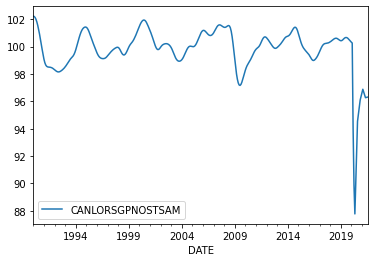

In [6]:

gdp_index_df = gdp_index_df.loc['1990-01-01':'2021-11-01']
gdp_index_df.plot()

In [7]:
chartered_bank_df = pd.read_csv(chartered_bank_path)
chartered_bank_df

,"Assets, liabilities and monetary aggregates",Reference period,Canada
0,NaN,NaN,Dollars
1,"Chartered bank deposits, personal 5",January 1990,"189,157"
2,NaN,February 1990,"191,182"
3,NaN,March 1990,"191,971"
4,NaN,April 1990,"193,156"
...,...,...,...
3425,NaN,May 2021,"1,390,643"
3426,NaN,June 2021,"1,410,445"
3427,NaN,July 2021,"1,420,758"
3428,NaN,August 2021,"1,435,597"


In [8]:
#dropping extra columns
bond_df = bond_df.drop(columns=['GEO',
                           'DGUID',  
                           'UOM', 
                           'UOM_ID', 
                           'SCALAR_FACTOR', 
                           'SCALAR_ID', 
                           'VECTOR', 
                           'COORDINATE', 
                           'STATUS', 
                           'SYMBOL', 
                           'TERMINATED', 
                           'DECIMALS',
                            'Financial market statistics'])



In [9]:
#isolate 5, 10, and long term benchmark bond yeilds
bond_df.reset_index(inplace=True)

bond_5 = bond_df.loc[:10916]
bond_5.reset_index(inplace=True, drop=True)

bond_10 = bond_df.loc[10917:21833]
bond_10.reset_index(inplace=True, drop=True)

bond_long = bond_df.loc[21834:]
bond_long.reset_index(inplace=True, drop=True)

In [10]:
bond_combined = pd.concat([bond_5, bond_10, bond_long], join="inner", axis=1)
bond_combined

,REF_DATE,VALUE,REF_DATE,VALUE,REF_DATE,VALUE
0,1990-01-28,0.00,1990-01-28,0.00,1990-01-28,0.00
1,1990-01-29,10.07,1990-01-29,10.00,1990-01-29,9.89
2,1990-01-31,10.02,1990-01-31,9.93,1990-01-31,9.75
3,1990-02-01,10.05,1990-02-01,9.94,1990-02-01,9.74
4,1990-02-02,10.07,1990-02-02,9.97,1990-02-02,9.79
...,...,...,...,...,...,...
10912,2021-11-27,0.00,2021-11-27,0.00,2021-11-27,0.00
10913,2021-11-28,0.00,2021-11-28,0.00,2021-11-28,0.00
10914,2021-11-29,1.41,2021-11-29,1.61,2021-11-29,1.94
10915,2021-11-30,1.40,2021-11-30,1.58,2021-11-30,1.89


In [11]:
#rename columns
bond_combined.columns = ['date', '5_year_bond_benchmark', 'date2', '10_year_bond_benchmark', 'date3','long_term_bond_benchmark']

In [12]:
#drop extra date columns
bond_combined.drop(columns=['date2', 'date3'], inplace=True)


In [13]:
#Pick non-zero values which turns all zero values into nan and remove nan-values
bond_combined = bond_combined[bond_combined!=0].dropna()

In [14]:
#determine monthly average yeild for each bond length to align weith other datasets
bond_monthly = bond_combined.groupby(pd.PeriodIndex(bond_combined['date'], freq="M"))['5_year_bond_benchmark','10_year_bond_benchmark','long_term_bond_benchmark'].mean().reset_index()

In [15]:
bond_monthly

,date,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark
0,1990-01,10.045000,9.965000,9.820000
1,1990-02,10.538182,10.253636,9.999091
2,1990-03,11.147692,10.761538,10.596154
3,1990-04,12.175000,11.519286,11.275714
4,1990-05,11.741538,11.125385,10.990000
...,...,...,...,...
379,2021-08,0.837143,1.191905,1.755238
380,2021-09,0.884000,1.263000,1.803500
381,2021-10,1.258500,1.597000,2.007500
382,2021-11,1.465000,1.686000,2.028000


<AxesSubplot:xlabel='Date'>

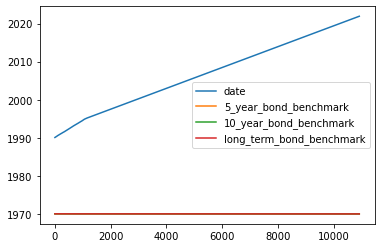

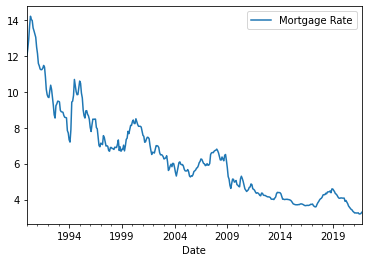

In [16]:
mortgage_df2 = mortgage_df.loc["01-01-1990":]
bond_combined.plot()
mortgage_df2.plot()

In [17]:
#
employment_df = employment_df.drop(columns=['GEO',
                           'DGUID',  
                           'UOM', 
                           'UOM_ID', 
                           'SCALAR_FACTOR', 
                           'SCALAR_ID', 
                           'VECTOR', 
                           'COORDINATE', 
                           'STATUS', 
                           'SYMBOL', 
                           'TERMINATED', 
                           'DECIMALS',
                            'Labour force characteristics',
                            'Sex',
                            'Age group',
                            'Educational attainment'])

In [18]:
employment_df.reset_index(inplace=True)

unemployment = employment_df.loc[:382]
unemployment.reset_index(inplace=True, drop=True)

participation = employment_df.loc[383:765]
participation.reset_index(inplace=True, drop=True)

employment = employment_df.loc[766:]
employment.reset_index(inplace=True, drop=True)

employment

,REF_DATE,VALUE
0,1990-01-01,60.4
1,1990-02-01,60.6
2,1990-03-01,60.7
3,1990-04-01,61.1
4,1990-05-01,62.4
...,...,...
378,2021-07-01,61.1
379,2021-08-01,61.2
380,2021-09-01,61.2
381,2021-10-01,61.2


<AxesSubplot:xlabel='date'>

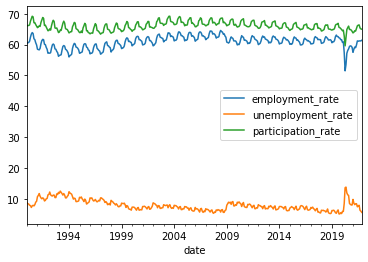

In [19]:
employment_combined = pd.concat([employment, unemployment, participation], join="inner", axis=1)

employment_combined.columns = ['date', 'employment_rate', 'date2', 'unemployment_rate', 'date3','participation_rate']

#drop extra date columns
employment_combined.drop(columns=['date2', 'date3'], inplace=True)

employment_combined.set_index('date', inplace=True)
employment_combined.plot()

In [20]:
#isloate data from 1990 to present for datasets
mortgage_df2 = mortgage_df.loc["01-01-1990":]


In [21]:
boc_df2 = boc_df.loc["Jan 1990":]

In [22]:
inflation_df = inflation_df.drop(columns=['GEO',
                           'DGUID',
                           'Alternative measures', 
                           'Release', 
                           'UOM', 
                           'UOM_ID', 
                           'SCALAR_FACTOR', 
                           'SCALAR_ID', 
                           'VECTOR', 
                           'COORDINATE', 
                           'STATUS', 
                           'SYMBOL', 
                           'TERMINATED', 
                           'DECIMALS'])
                

In [23]:
inflation_df.reset_index(inplace=True)

inflation_common = inflation_df.loc[0:381]
inflation_common.reset_index(inplace=True, drop=True)
inflation_common.head()

,REF_DATE,VALUE
0,1990-01-01,3.4
1,1990-02-01,3.3
2,1990-03-01,3.4
3,1990-04-01,3.5
4,1990-05-01,3.6


In [24]:
inflation_weighted_median = inflation_df.loc[1910:2292] 
inflation_weighted_median.reset_index(inplace=True, drop=True)
inflation_weighted_median.head()

,REF_DATE,VALUE
0,1990-01-01,4.7
1,1990-02-01,4.5
2,1990-03-01,4.3
3,1990-04-01,4.2
4,1990-05-01,4.0


In [25]:
inflation_trimmed_median = inflation_df.loc[3820:4202]
inflation_trimmed_median.reset_index(inplace=True, drop=True)
inflation_trimmed_median.head()

,REF_DATE,VALUE
0,1990-01-01,4.9
1,1990-02-01,4.7
2,1990-03-01,4.6
3,1990-04-01,4.5
4,1990-05-01,4.3


In [26]:
inflation_combined = pd.concat([inflation_common, inflation_trimmed_median, inflation_weighted_median], join="inner", axis=1)
inflation_combined

,REF_DATE,VALUE,REF_DATE,VALUE,REF_DATE,VALUE
0,1990-01-01,3.4,1990-01-01,4.9,1990-01-01,4.7
1,1990-02-01,3.3,1990-02-01,4.7,1990-02-01,4.5
2,1990-03-01,3.4,1990-03-01,4.6,1990-03-01,4.3
3,1990-04-01,3.5,1990-04-01,4.5,1990-04-01,4.2
4,1990-05-01,3.6,1990-05-01,4.3,1990-05-01,4.0
...,...,...,...,...,...,...
377,2021-06-01,1.7,2021-06-01,2.6,2021-06-01,2.4
378,2021-07-01,1.7,2021-07-01,3.1,2021-07-01,2.7
379,2021-08-01,1.8,2021-08-01,3.2,2021-08-01,2.8
380,2021-09-01,1.8,2021-09-01,3.3,2021-09-01,2.9


In [27]:
inflation_combined.columns = ['date', 'inflation_common', 'date2', 'inflation_trimmed_median', 'date3','inflation_weighted_median']
inflation_combined.head()

,date,inflation_common,date2,inflation_trimmed_median,date3,inflation_weighted_median
0,1990-01-01,3.4,1990-01-01,4.9,1990-01-01,4.7
1,1990-02-01,3.3,1990-02-01,4.7,1990-02-01,4.5
2,1990-03-01,3.4,1990-03-01,4.6,1990-03-01,4.3
3,1990-04-01,3.5,1990-04-01,4.5,1990-04-01,4.2
4,1990-05-01,3.6,1990-05-01,4.3,1990-05-01,4.0


In [28]:
inflation_combined.drop(columns=['date2','date3'], inplace=True)


In [29]:
inflation_combined.head()

,date,inflation_common,inflation_trimmed_median,inflation_weighted_median
0,1990-01-01,3.4,4.9,4.7
1,1990-02-01,3.3,4.7,4.5
2,1990-03-01,3.4,4.6,4.3
3,1990-04-01,3.5,4.5,4.2
4,1990-05-01,3.6,4.3,4.0


In [30]:
mortgage_rate_df = pd.read_excel(mortgage_path, index_col='Date')
mortgage_rate_df.head()

,Mortgage Rate
Date,
1951-06-01,5.50
1951-07-01,5.62
1951-08-01,5.62
1951-09-01,5.75
1951-10-01,5.75


In [31]:
mortgage_rate_df['Monthly Change'] = mortgage_rate_df.pct_change()

In [32]:
# Select only the returns
monthly_change = mortgage_rate_df.loc[:, 'Monthly Change']

<AxesSubplot:>

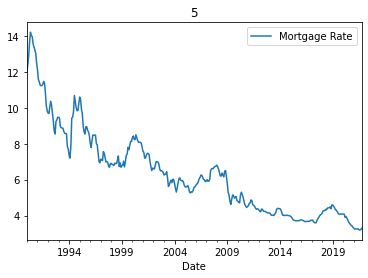

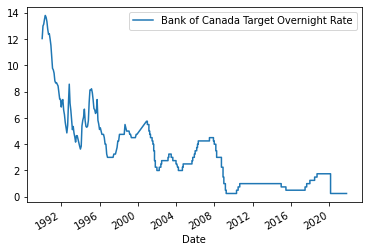

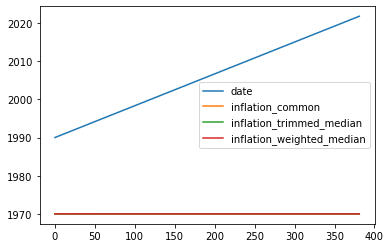

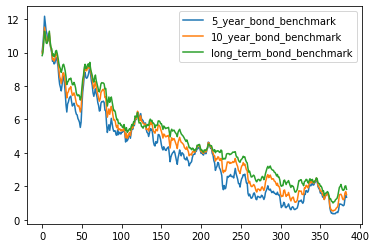

In [33]:
mortgage_df2.plot(title=5)
boc_df2.plot()
inflation_combined.plot()
bond_monthly.plot(kind='line')

In [36]:
inflation_combined

,date,inflation_common,inflation_trimmed_median,inflation_weighted_median
0,1990-01-01,3.4,4.9,4.7
1,1990-02-01,3.3,4.7,4.5
2,1990-03-01,3.4,4.6,4.3
3,1990-04-01,3.5,4.5,4.2
4,1990-05-01,3.6,4.3,4.0
...,...,...,...,...
377,2021-06-01,1.7,2.6,2.4
378,2021-07-01,1.7,3.1,2.7
379,2021-08-01,1.8,3.2,2.8
380,2021-09-01,1.8,3.3,2.9


In [37]:
bond_monthly.set_index('date',inplace=True)

In [38]:
inflation_combined.set_index('date', inplace=True)

In [39]:
test = pd.concat([mortgage_df2, inflation_combined], join="inner", axis=0)
test

""
1990-01-01
1990-02-01
1990-03-01
1990-04-01
1990-05-01
...
2021-06-01
2021-07-01
2021-08-01
2021-09-01


In [40]:
inflation_dt = inflation_combined.set_index('date')

KeyError: "None of ['date'] are in the columns"

KeyError: "None of ['date'] are in the columns"

In [42]:
inflation_dt

NameError: name 'inflation_dt' is not defined

In [43]:
boc_df2.reset_index(inplace=True)
boc_df2

,Date,Bank of Canada Target Overnight Rate
0,1990-01-01,12.04
1,1990-02-01,13.00
2,1990-03-01,13.13
3,1990-04-01,13.52
4,1990-05-01,13.80
...,...,...
5567,2021-11-01,0.25
5568,2021-11-01,0.25
5569,2021-11-01,0.25
5570,2021-11-01,0.25


In [44]:
boc_df_trimmed = boc_df2.drop_duplicates(subset='Date')
boc_df_trimmed.set_index('Date', inplace=True)

In [45]:
bond_monthly.to_csv("bond_monthly.csv")

In [46]:
bond_monthly_df = pd.read_csv("bond_monthly.csv", index_col='date', parse_dates=True, infer_datetime_format=True)
bond_monthly_df

,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark
date,,,
1990-01-01,10.045000,9.965000,9.820000
1990-02-01,10.538182,10.253636,9.999091
1990-03-01,11.147692,10.761538,10.596154
1990-04-01,12.175000,11.519286,11.275714
1990-05-01,11.741538,11.125385,10.990000
...,...,...,...
2021-08-01,0.837143,1.191905,1.755238
2021-09-01,0.884000,1.263000,1.803500
2021-10-01,1.258500,1.597000,2.007500


In [47]:
boc_df_trimmed.to_csv("boc_test.csv")



In [50]:
cleaned_data = pd.concat([gdp_index_df, inflation_combined, employment_combined, bond_monthly_df, boc_df_trimmed, mortgage_df2], axis=1, join="inner")
cleaned_data

,CANLORSGPNOSTSAM,inflation_common,inflation_trimmed_median,inflation_weighted_median,employment_rate,unemployment_rate,participation_rate,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark,Bank of Canada Target Overnight Rate,Mortgage Rate
1990-01-01,102.220629,3.4,4.9,4.7,60.4,8.7,66.1,10.045000,9.965000,9.820000,12.04,12.01
1990-02-01,102.203404,3.3,4.7,4.5,60.6,8.4,66.2,10.538182,10.253636,9.999091,13.00,12.42
1990-03-01,102.130889,3.4,4.6,4.3,60.7,8.3,66.2,11.147692,10.761538,10.596154,13.13,12.92
1990-04-01,101.995714,3.5,4.5,4.2,61.1,7.9,66.4,12.175000,11.519286,11.275714,13.52,13.67
1990-05-01,101.800030,3.6,4.3,4.0,62.4,7.8,67.6,11.741538,11.125385,10.990000,13.80,14.21
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,96.474789,1.7,2.3,2.2,59.0,8.4,64.4,0.943333,1.516190,1.991429,0.25,3.25
2021-05-01,96.267316,1.8,2.6,2.4,59.9,8.4,65.3,0.918000,1.524000,2.112000,0.25,3.25
2021-06-01,96.285140,1.7,2.6,2.4,61.2,7.4,66.1,0.915455,1.425000,1.921818,0.25,3.26
2021-07-01,96.299413,1.7,3.1,2.7,61.1,7.7,66.3,0.861429,1.251429,1.779048,0.25,3.20


In [52]:
cleaned_data.corr()

,CANLORSGPNOSTSAM,inflation_common,inflation_trimmed_median,inflation_weighted_median,employment_rate,unemployment_rate,participation_rate,5_year_bond_benchmark,10_year_bond_benchmark,long_term_bond_benchmark,Bank of Canada Target Overnight Rate,Mortgage Rate
CANLORSGPNOSTSAM,1.000000,0.066354,0.121322,0.054262,0.467813,-0.513662,0.266261,0.188699,0.171352,0.139199,0.232898,0.165441
inflation_common,0.066354,1.000000,0.800425,0.858555,0.240865,0.011402,0.382232,0.433420,0.415328,0.397803,0.551937,0.514701
inflation_trimmed_median,0.121322,0.800425,1.000000,0.961644,0.186527,-0.043774,0.248164,0.397166,0.357829,0.326662,0.574478,0.475627
inflation_weighted_median,0.054262,0.858555,0.961644,1.000000,0.199430,-0.006731,0.301889,0.368015,0.337665,0.314625,0.539126,0.458413
employment_rate,0.467813,0.240865,0.186527,0.199430,1.000000,-0.791967,0.838577,-0.288068,-0.302086,-0.331565,-0.200266,-0.267527
unemployment_rate,-0.513662,0.011402,-0.043774,-0.006731,-0.791967,1.000000,-0.332456,0.522367,0.557669,0.595892,0.383318,0.515241
participation_rate,0.266261,0.382232,0.248164,0.301889,0.838577,-0.332456,1.000000,0.020974,0.031058,0.019738,0.031845,0.046586
5_year_bond_benchmark,0.188699,0.433420,0.397166,0.368015,-0.288068,0.522367,0.020974,1.000000,0.993858,0.983117,0.935290,0.984746
10_year_bond_benchmark,0.171352,0.415328,0.357829,0.337665,-0.302086,0.557669,0.031058,0.993858,1.000000,0.996626,0.904165,0.976229
long_term_bond_benchmark,0.139199,0.397803,0.326662,0.314625,-0.331565,0.595892,0.019738,0.983117,0.996626,1.000000,0.882342,0.966596


In [ ]:
cleaned_data.to_csv("cleaned_data.csv")